# Exercises 4: Wine Classification with Logistic Regression

In [48]:
import scipy.io
import numpy as np

In [49]:
data=scipy.io.loadmat('data.mat')

data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Feb 23 17:22:16 2024',
 '__version__': '1.0',
 '__globals__': [],
 'y': array([[1.],
        [0.],
        [1.],
        ...,
        [0.],
        [0.],
        [0.]], shape=(5000, 1)),
 'X': array([[ 8.6 ,  0.42,  0.39, ...,  0.69, 11.7 ,  0.8 ],
        [ 8.2 ,  0.3 ,  0.44, ...,  0.33, 12.  ,  0.6 ],
        [10.8 ,  0.32,  0.44, ...,  0.78, 10.  ,  0.6 ],
        ...,
        [ 6.2 ,  0.28,  0.33, ...,  0.5 , 12.1 ,  0.6 ],
        [ 6.1 ,  0.41,  0.24, ...,  0.5 , 10.4 ,  0.6 ],
        [ 7.3 ,  0.19,  0.68, ...,  0.64,  9.4 ,  0.6 ]], shape=(5000, 12)),
 'description': array(['fixed acidity       ', 'volatile acidity    ',
        'citric acid         ', 'residual sugar      ',
        'chlorides           ', 'free sulfur dioxide ',
        'total sulfur dioxide', 'density             ',
        'pH                  ', 'sulphates           ',
        'alcohol             ', 'quality             '], dtype='<U20

In [50]:
X_train=data['X']
X_train

array([[ 8.6 ,  0.42,  0.39, ...,  0.69, 11.7 ,  0.8 ],
       [ 8.2 ,  0.3 ,  0.44, ...,  0.33, 12.  ,  0.6 ],
       [10.8 ,  0.32,  0.44, ...,  0.78, 10.  ,  0.6 ],
       ...,
       [ 6.2 ,  0.28,  0.33, ...,  0.5 , 12.1 ,  0.6 ],
       [ 6.1 ,  0.41,  0.24, ...,  0.5 , 10.4 ,  0.6 ],
       [ 7.3 ,  0.19,  0.68, ...,  0.64,  9.4 ,  0.6 ]], shape=(5000, 12))

In [51]:
y=data['y']
y

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], shape=(5000, 1))

In [52]:
X_test=data['X_test']
X_test

array([[ 6.5 ,  0.18,  0.33, ...,  0.44,  8.7 ,  0.7 ],
       [ 7.4 ,  0.15,  0.42, ...,  0.6 , 10.4 ,  0.6 ],
       [ 7.3 ,  0.24,  0.41, ...,  0.43,  9.7 ,  0.5 ],
       ...,
       [ 6.3 ,  0.14,  0.39, ...,  0.53, 10.3 ,  0.6 ],
       [ 6.8 ,  0.81,  0.05, ...,  0.66, 10.8 ,  0.6 ],
       [ 6.9 ,  0.21,  0.62, ...,  0.59, 10.2 ,  0.6 ]], shape=(1000, 12))

# 1
$$
\nabla f(w) = \frac{1}{N}X^T(S(Xw)-y)+\lambda w
$$
$$
\omega^{t+1}=\omega^{t}-\epsilon \nabla f(\omega^{(t)})
$$

# 2

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)

learning_rate=0.01
lambda_reg=0.1
max_iterations=10000


In [55]:
train_mean=np.mean(X_train,axis=0)
train_std=np.std(X_train,axis=0)

X_train_normalized=(X_train-train_mean)/train_std

X_test_normalized=(X_test-train_mean)/train_std

X_train_processed=np.hstack([np.ones((X_train_normalized.shape[0],1)),X_train_normalized])

X_test_processed=np.hstack([np.ones((X_test_normalized.shape[0],1)),X_test_normalized])

X_train_split,X_val,y_train_split,y_val=train_test_split(
    X_train_processed,
    y.flatten(),
    test_size=0.2,
    random_state=RANDOM_SEED,
    shuffle=True
)

print(f"训练集形状: {X_train_split.shape}")
print(f"验证集形状: {X_val.shape}")
print(f"测试集形状: {X_test_processed.shape}")


训练集形状: (4000, 13)
验证集形状: (1000, 13)
测试集形状: (1000, 13)


In [56]:
from scipy.special import expit

w=np.zeros(X_train_split.shape[1])

def compute_loss(X,y,w,lambda_reg):
    N=X.shape[0]
    z=X@w
    log_loss = np.sum(np.log(1 + np.exp(-z)) + (1-y) * z)
    regularization = (lambda_reg / 2) * np.sum(w**2)
    return (1/N) * log_loss + regularization


def compute_gradient(X,y,w,lambda_reg):
    N = X.shape[0]
    z = X @ w
    sigma = expit(z)  # sigmoid 函数
    gradient = (1/N) * X.T @ (sigma - y) + lambda_reg * w
    return gradient

In [57]:
# 批量梯度下降训练
loss_history = []
train_loss_history = []
val_loss_history = []

for iteration in range(max_iterations):
    # 计算梯度
    gradient = compute_gradient(X_train_split, y_train_split, w, lambda_reg)
    
    # 更新权重
    w = w - learning_rate * gradient
    
    # 记录损失
    train_loss = compute_loss(X_train_split, y_train_split, w, lambda_reg)
    val_loss = compute_loss(X_val, y_val, w, lambda_reg)
    
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    loss_history.append(train_loss)  # 用于绘图
    
    # 可选：每100次迭代打印一次
    if (iteration + 1) % 100 == 0:
        print(f"Iteration {iteration + 1}: Train Loss = {train_loss:.6f}, Val Loss = {val_loss:.6f}")

Iteration 100: Train Loss = 0.430633, Val Loss = 0.437119
Iteration 200: Train Loss = 0.350843, Val Loss = 0.358195
Iteration 300: Train Loss = 0.317801, Val Loss = 0.325245
Iteration 400: Train Loss = 0.301859, Val Loss = 0.309230
Iteration 500: Train Loss = 0.293473, Val Loss = 0.300729
Iteration 600: Train Loss = 0.288811, Val Loss = 0.295945
Iteration 700: Train Loss = 0.286119, Val Loss = 0.293134
Iteration 800: Train Loss = 0.284519, Val Loss = 0.291425
Iteration 900: Train Loss = 0.283548, Val Loss = 0.290355
Iteration 1000: Train Loss = 0.282948, Val Loss = 0.289666
Iteration 1100: Train Loss = 0.282572, Val Loss = 0.289211
Iteration 1200: Train Loss = 0.282333, Val Loss = 0.288904
Iteration 1300: Train Loss = 0.282179, Val Loss = 0.288690
Iteration 1400: Train Loss = 0.282079, Val Loss = 0.288538
Iteration 1500: Train Loss = 0.282013, Val Loss = 0.288427
Iteration 1600: Train Loss = 0.281969, Val Loss = 0.288345
Iteration 1700: Train Loss = 0.281940, Val Loss = 0.288283
Iterat

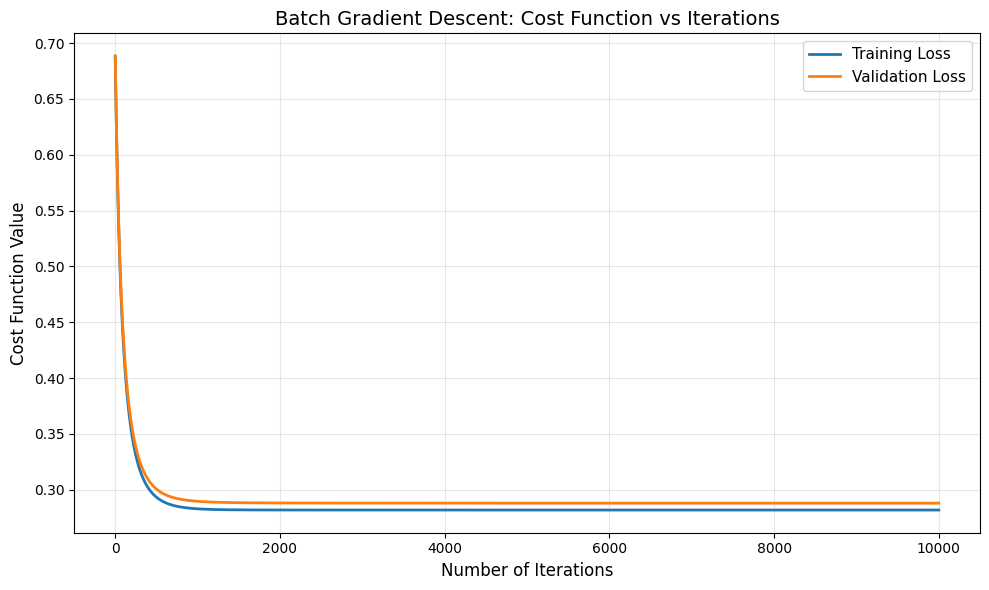


Final Training Loss: 0.281870
Final Validation Loss: 0.288033


In [58]:
import matplotlib.pyplot as plt
# 绘制损失函数随迭代次数的变化
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_iterations + 1), train_loss_history, label='Training Loss', linewidth=2)
plt.plot(range(1, max_iterations + 1), val_loss_history, label='Validation Loss', linewidth=2)
plt.xlabel('Number of Iterations', fontsize=12)
plt.ylabel('Cost Function Value', fontsize=12)
plt.title('Batch Gradient Descent: Cost Function vs Iterations', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nFinal Training Loss: {train_loss_history[-1]:.6f}")
print(f"Final Validation Loss: {val_loss_history[-1]:.6f}")

# 3

$$w^{(t+1)} = w^{(t)} - \epsilon \left[ x_i \left( S(x_i^T w^{(t)}) - y_i \right) + \lambda w^{(t)} \right]$$



# 4


In [72]:
w_sgd = np.zeros(X_train_split.shape[1])
sgd_learning_rate = 0.01
sgd_max_iterations = 50000 
sgd_lambda_reg = 0.1

In [73]:
def compute_loss_sgd(X, y, w, lambda_reg):
    N = X.shape[0]
    z = X @ w
    log_loss = np.sum(np.log(1 + np.exp(-z)) + (1-y) * z)
    regularization = (lambda_reg / 2) * np.sum(w**2)
    return (1/N) * log_loss + regularization

def compute_gradient_single_sample(x_i, y_i, w, lambda_reg):
    z_i = x_i @ w
    sigma_i = expit(z_i)  # sigmoid函数
    gradient = x_i * (sigma_i - y_i) + lambda_reg * w
    return gradient

In [74]:
# SGD训练
sgd_train_loss_history = []
sgd_val_loss_history = []

# 创建索引用于随机采样
N_train = X_train_split.shape[0]

# 设置随机种子以确保可重复性
np.random.seed(RANDOM_SEED)

for iteration in range(sgd_max_iterations):
    # 随机选择一个样本（有放回抽样）
    idx = np.random.randint(0, N_train)
    x_i = X_train_split[idx]
    y_i = y_train_split[idx]
    
    # 计算单个样本的梯度
    gradient = compute_gradient_single_sample(x_i, y_i, w_sgd, sgd_lambda_reg)
    
    # 使用SGD更新规则更新权重
    w_sgd = w_sgd - sgd_learning_rate * gradient
    
    # 定期记录损失（每100次迭代记录一次，减少计算开销）
    if (iteration + 1) % 100 == 0:
        train_loss = compute_loss_sgd(X_train_split, y_train_split, w_sgd, sgd_lambda_reg)
        val_loss = compute_loss_sgd(X_val, y_val, w_sgd, sgd_lambda_reg)
        
        sgd_train_loss_history.append(train_loss)
        sgd_val_loss_history.append(val_loss)
        
        if (iteration + 1) % 1000 == 0:
            print(f"迭代次数 {iteration + 1}: 训练损失 = {train_loss:.6f}, 验证损失 = {val_loss:.6f}")

# 计算最终损失
final_train_loss = compute_loss_sgd(X_train_split, y_train_split, w_sgd, sgd_lambda_reg)
final_val_loss = compute_loss_sgd(X_val, y_val, w_sgd, sgd_lambda_reg)

print(f"\nSGD最终训练损失: {final_train_loss:.6f}")
print(f"SGD最终验证损失: {final_val_loss:.6f}")

迭代次数 1000: 训练损失 = 0.283639, 验证损失 = 0.291008
迭代次数 2000: 训练损失 = 0.282107, 验证损失 = 0.287740
迭代次数 3000: 训练损失 = 0.283941, 验证损失 = 0.290388
迭代次数 4000: 训练损失 = 0.283348, 验证损失 = 0.289484
迭代次数 5000: 训练损失 = 0.283066, 验证损失 = 0.289993
迭代次数 6000: 训练损失 = 0.282207, 验证损失 = 0.288359
迭代次数 7000: 训练损失 = 0.282262, 验证损失 = 0.288627
迭代次数 8000: 训练损失 = 0.283572, 验证损失 = 0.288144
迭代次数 9000: 训练损失 = 0.282640, 验证损失 = 0.289123
迭代次数 10000: 训练损失 = 0.282505, 验证损失 = 0.288612
迭代次数 11000: 训练损失 = 0.282922, 验证损失 = 0.289431
迭代次数 12000: 训练损失 = 0.282955, 验证损失 = 0.288874
迭代次数 13000: 训练损失 = 0.282187, 验证损失 = 0.288172
迭代次数 14000: 训练损失 = 0.282687, 验证损失 = 0.288334
迭代次数 15000: 训练损失 = 0.282525, 验证损失 = 0.289149
迭代次数 16000: 训练损失 = 0.284036, 验证损失 = 0.290835
迭代次数 17000: 训练损失 = 0.283414, 验证损失 = 0.289261
迭代次数 18000: 训练损失 = 0.282499, 验证损失 = 0.288912
迭代次数 19000: 训练损失 = 0.282640, 验证损失 = 0.288597
迭代次数 20000: 训练损失 = 0.282278, 验证损失 = 0.288146
迭代次数 21000: 训练损失 = 0.283011, 验证损失 = 0.288963
迭代次数 22000: 训练损失 = 0.282720, 验证损失 = 0.288317
迭代次数 23000: 训练损失 = 

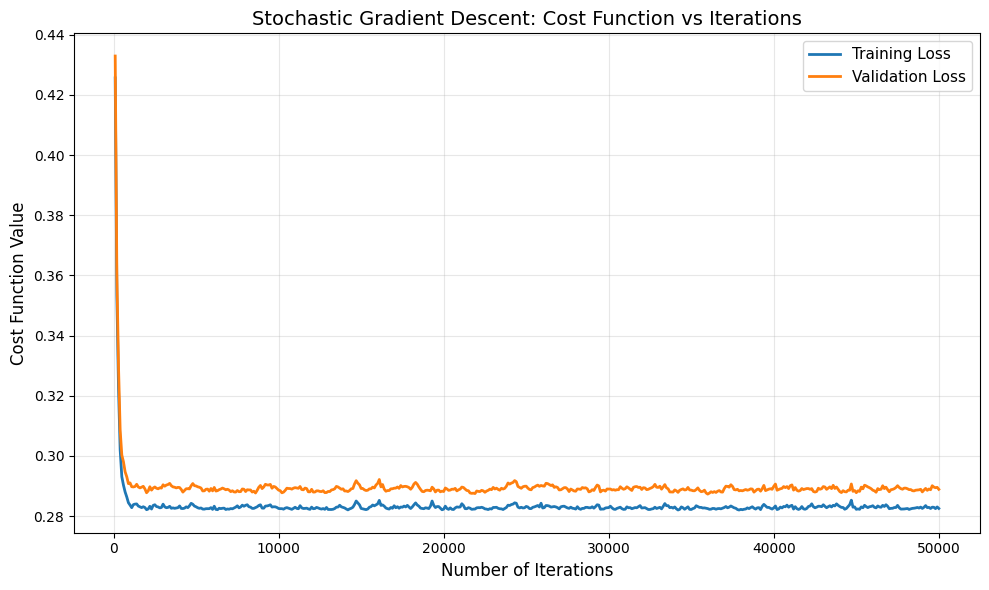


Final Training Loss: 0.282521
Final Validation Loss: 0.288882


In [75]:
import matplotlib.pyplot as plt
# 绘制SGD损失函数随迭代次数的变化
# 注意：SGD每100次迭代记录一次，所以需要创建对应的迭代次数数组
sgd_iterations = np.arange(100, sgd_max_iterations + 1, 100)

plt.figure(figsize=(10, 6))
plt.plot(sgd_iterations, sgd_train_loss_history, label='Training Loss', linewidth=2)
plt.plot(sgd_iterations, sgd_val_loss_history, label='Validation Loss', linewidth=2)
plt.xlabel('Number of Iterations', fontsize=12)
plt.ylabel('Cost Function Value', fontsize=12)
plt.title('Stochastic Gradient Descent: Cost Function vs Iterations', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nFinal Training Loss: {sgd_train_loss_history[-1]:.6f}")
print(f"Final Validation Loss: {sgd_val_loss_history[-1]:.6f}")

# 5

In [76]:
# Learning Rate Scheduling for SGD
# Test different values of delta to find the best one

# Initialize parameters
w_sgd_scheduled = np.zeros(X_train_split.shape[1])
sgd_scheduled_max_iterations = 50000
sgd_lambda_reg = 0.1

# Test different delta values
delta_candidates = [1, 5, 10, 50, 100, 200]
best_delta = None
best_final_loss = float('inf')

print("Testing different delta values...")
print("-" * 60)

for delta in delta_candidates:
    # Reset weights for each delta test
    w_test = np.zeros(X_train_split.shape[1])
    np.random.seed(RANDOM_SEED)
    
    # Run SGD for a shorter period to test (e.g., 10000 iterations)
    test_iterations = 10000
    final_losses = []
    
    for iteration in range(test_iterations):
        # Random sample
        idx = np.random.randint(0, N_train)
        x_i = X_train_split[idx]
        y_i = y_train_split[idx]
        
        # Compute gradient
        gradient = compute_gradient_single_sample(x_i, y_i, w_test, sgd_lambda_reg)
        
        # Learning rate schedule: epsilon_t = delta / t
        # Note: iteration starts at 0, so we use (iteration + 1)
        learning_rate_t = delta / (iteration + 1)
        
        # Update weights
        w_test = w_test - learning_rate_t * gradient
    
    # Evaluate final loss
    final_train_loss = compute_loss_sgd(X_train_split, y_train_split, w_test, sgd_lambda_reg)
    final_val_loss = compute_loss_sgd(X_val, y_val, w_test, sgd_lambda_reg)
    
    print(f"Delta = {delta:3d}: Final Train Loss = {final_train_loss:.6f}, Final Val Loss = {final_val_loss:.6f}")
    
    # Track best delta based on validation loss
    if final_val_loss < best_final_loss:
        best_final_loss = final_val_loss
        best_delta = delta

print("-" * 60)
print(f"Best delta (based on validation loss): {best_delta}")
print(f"Best validation loss: {best_final_loss:.6f}")

Testing different delta values...
------------------------------------------------------------
Delta =   1: Final Train Loss = 0.292545, Final Val Loss = 0.302182
Delta =   5: Final Train Loss = 0.281914, Final Val Loss = 0.288223
Delta =  10: Final Train Loss = 0.281988, Final Val Loss = 0.288217
Delta =  50: Final Train Loss = 0.282372, Final Val Loss = 0.288635
Delta = 100: Final Train Loss = 0.282523, Final Val Loss = 0.288634
Delta = 200: Final Train Loss = 0.282715, Final Val Loss = 0.288450
------------------------------------------------------------
Best delta (based on validation loss): 10
Best validation loss: 0.288217


In [77]:
# Run full SGD with learning rate scheduling using the best delta
delta = best_delta  # Use the empirically selected delta
print(f"\nRunning full SGD with learning rate scheduling (delta = {delta})...")
print(f"Learning rate schedule: epsilon_t = {delta} / t")
print("-" * 60)

# Reset weights
w_sgd_scheduled = np.zeros(X_train_split.shape[1])
sgd_scheduled_train_loss_history = []
sgd_scheduled_val_loss_history = []
sgd_scheduled_iterations = []

# Set random seed
np.random.seed(RANDOM_SEED)

for iteration in range(sgd_scheduled_max_iterations):
    # Random sample
    idx = np.random.randint(0, N_train)
    x_i = X_train_split[idx]
    y_i = y_train_split[idx]
    
    # Compute gradient
    gradient = compute_gradient_single_sample(x_i, y_i, w_sgd_scheduled, sgd_lambda_reg)
    
    # Learning rate schedule: epsilon_t = delta / t
    # Note: iteration starts at 0, so we use (iteration + 1)
    learning_rate_t = delta / (iteration + 1)
    
    # Update weights
    w_sgd_scheduled = w_sgd_scheduled - learning_rate_t * gradient
    
    # Record loss periodically (every 100 iterations)
    if (iteration + 1) % 100 == 0:
        train_loss = compute_loss_sgd(X_train_split, y_train_split, w_sgd_scheduled, sgd_lambda_reg)
        val_loss = compute_loss_sgd(X_val, y_val, w_sgd_scheduled, sgd_lambda_reg)
        
        sgd_scheduled_train_loss_history.append(train_loss)
        sgd_scheduled_val_loss_history.append(val_loss)
        sgd_scheduled_iterations.append(iteration + 1)
        
        if (iteration + 1) % 5000 == 0:
            print(f"Iteration {iteration + 1}: Train Loss = {train_loss:.6f}, Val Loss = {val_loss:.6f}, LR = {learning_rate_t:.6f}")

# Final evaluation
final_train_loss_scheduled = compute_loss_sgd(X_train_split, y_train_split, w_sgd_scheduled, sgd_lambda_reg)
final_val_loss_scheduled = compute_loss_sgd(X_val, y_val, w_sgd_scheduled, sgd_lambda_reg)

print("-" * 60)
print(f"Final Training Loss: {final_train_loss_scheduled:.6f}")
print(f"Final Validation Loss: {final_val_loss_scheduled:.6f}")
print(f"Delta chosen: {delta}")


Running full SGD with learning rate scheduling (delta = 10)...
Learning rate schedule: epsilon_t = 10 / t
------------------------------------------------------------
Iteration 5000: Train Loss = 0.282292, Val Loss = 0.288752, LR = 0.002000
Iteration 10000: Train Loss = 0.281988, Val Loss = 0.288217, LR = 0.001000
Iteration 15000: Train Loss = 0.281916, Val Loss = 0.288187, LR = 0.000667
Iteration 20000: Train Loss = 0.281923, Val Loss = 0.288013, LR = 0.000500
Iteration 25000: Train Loss = 0.281905, Val Loss = 0.288107, LR = 0.000400
Iteration 30000: Train Loss = 0.281933, Val Loss = 0.288143, LR = 0.000333
Iteration 35000: Train Loss = 0.281892, Val Loss = 0.288180, LR = 0.000286
Iteration 40000: Train Loss = 0.281893, Val Loss = 0.288151, LR = 0.000250
Iteration 45000: Train Loss = 0.281894, Val Loss = 0.288065, LR = 0.000222
Iteration 50000: Train Loss = 0.281881, Val Loss = 0.288078, LR = 0.000200
------------------------------------------------------------
Final Training Loss: 0

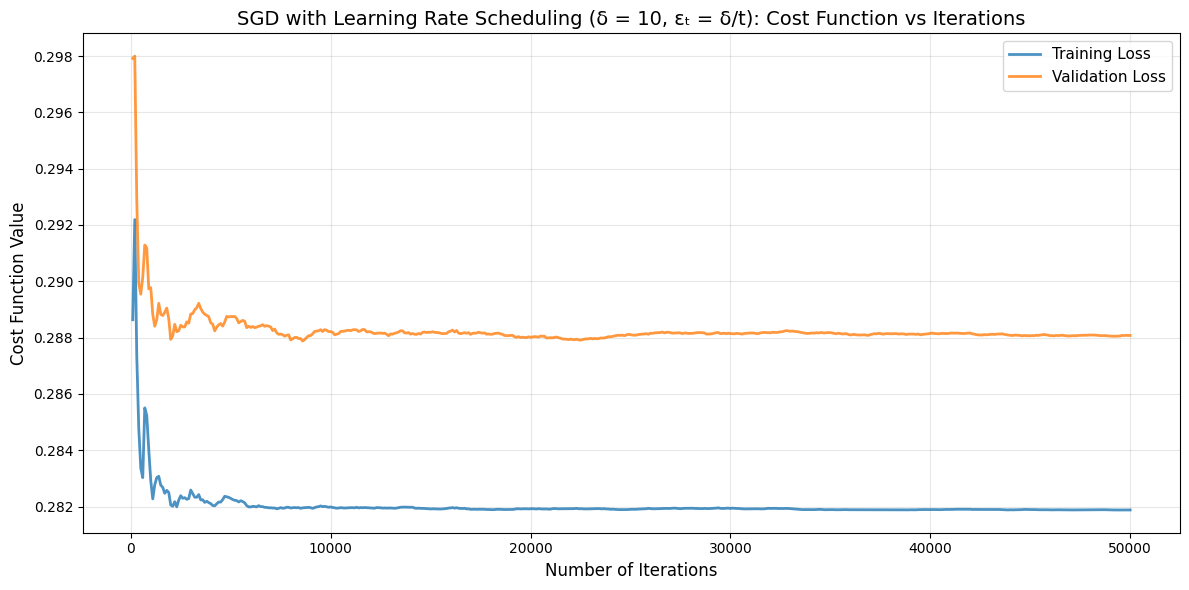


Delta (δ) chosen empirically: 10
Learning rate schedule: εₜ = 10 / t
Final Training Loss: 0.281881
Final Validation Loss: 0.288078


In [78]:
# Plot the cost function versus number of iterations
plt.figure(figsize=(12, 6))
plt.plot(sgd_scheduled_iterations, sgd_scheduled_train_loss_history, 
         label='Training Loss', linewidth=2, alpha=0.8)
plt.plot(sgd_scheduled_iterations, sgd_scheduled_val_loss_history, 
         label='Validation Loss', linewidth=2, alpha=0.8)
plt.xlabel('Number of Iterations', fontsize=12)
plt.ylabel('Cost Function Value', fontsize=12)
plt.title(f'SGD with Learning Rate Scheduling (δ = {delta}, εₜ = δ/t): Cost Function vs Iterations', 
          fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nDelta (δ) chosen empirically: {delta}")
print(f"Learning rate schedule: εₜ = {delta} / t")
print(f"Final Training Loss: {sgd_scheduled_train_loss_history[-1]:.6f}")
print(f"Final Validation Loss: {sgd_scheduled_val_loss_history[-1]:.6f}")